## Import Dataset and Prepare Data

In [71]:
import pandas as pd
data_before_18 = pd.read_csv('./before-2018-yearly-emission.csv')
data_19_20 = pd.read_csv('./daily-co2-per-contry-2019-2021.csv')

In [72]:
data_before_18 = data_before_18.rename(columns = {"Country/Region": "country"})
data_before_18['country'] = data_before_18['country'].str.replace('United States', 'US')
data_before_18['country'] = data_before_18['country'].str.replace('United Kingdom', 'UK')

areas_19_20 = data_19_20.country.unique()
areas_before_18 = data_before_18.country.unique()

data_before_18 = data_before_18[data_before_18["country"].isin(areas_19_20)]
data_19_20 = data_19_20[data_19_20["country"].isin(areas_before_18)]

# convert date to Date object
data_19_20['date'] = pd.to_datetime(data_19_20['date'])


In [73]:
data_compare = {"country": [], "2014": [], "2015": [],"2016": [],"2017": [],"2018": [], "2019": [], "2020": []}

for area in data_before_18['country'].unique():
    data_compare["country"].append(area)
    data_compare["2014"].append(data_before_18.loc[(data_before_18['country'] == area), "2014"].values[0])
    data_compare["2015"].append(data_before_18.loc[(data_before_18['country'] == area), "2015"].values[0])
    data_compare["2016"].append(data_before_18.loc[(data_before_18['country'] == area), "2016"].values[0])
    data_compare["2017"].append(data_before_18.loc[(data_before_18['country'] == area), "2017"].values[0])
    data_compare["2018"].append(data_before_18.loc[(data_before_18['country'] == area), "2018"].values[0])
    data_compare["2019"].append(
        round(data_19_20[(data_19_20["country"] == area) & (data_19_20["date"] >= "2019-01-01") & (data_19_20["date"] < "2020-01-01")]["value"].sum(), 2))
    data_compare["2020"].append(
        round(data_19_20[(data_19_20["country"] == area) & (data_19_20["date"] >= "2020-01-01") & (data_19_20["date"] <= "2020-12-31")]["value"].sum(), 2))
    
    
compre_df = pd.DataFrame(data_compare)
compre_df


,country,2014,2015,2016,2017,2018,2019,2020
0,China,9184.77,9120.27,9164.21,9367.67,9663.36,10492.85,10563.36
1,US,4683.35,4563.52,4656.84,4581.90,4749.57,5111.43,4598.31
2,India,2072.03,2085.38,2149.01,2267.16,2400.25,2471.63,2269.83
3,Japan,1170.11,1131.74,1139.33,1119.86,1074.08,1108.40,1046.54
4,Russia,919.33,870.02,971.87,998.24,1049.05,1557.77,1505.83
5,Brazil,768.77,741.96,826.21,834.14,812.02,434.68,389.58
6,Germany,708.25,713.08,717.68,702.73,680.06,686.75,624.43
7,UK,403.89,389.41,367.93,355.42,347.84,379.95,329.58
8,Italy,292.83,303.19,320.52,316.37,312.03,331.15,298.33
9,France,243.42,249.42,250.72,254.37,247.98,309.94,272.68


## Observation: We saw a never happened decline in total emission of co2 in 2020 (except China)

In [77]:
compre_df_t = compre_df.T
compre_df_t.columns = compre_df_t.iloc[0]
compre_df_t = compre_df_t[1:]
compre_df_t


country,China,US,India,Japan,Russia,Brazil,Germany,UK,Italy,France,Spain
2014,9184.77,4683.35,2072.03,1170.11,919.33,768.77,708.25,403.89,292.83,243.42,233.1
2015,9120.27,4563.52,2085.38,1131.74,870.02,741.96,713.08,389.41,303.19,249.42,248.42
2016,9164.21,4656.84,2149.01,1139.33,971.87,826.21,717.68,367.93,320.52,250.72,233.15
2017,9367.67,4581.9,2267.16,1119.86,998.24,834.14,702.73,355.42,316.37,254.37,249.55
2018,9663.36,4749.57,2400.25,1074.08,1049.05,812.02,680.06,347.84,312.03,247.98,244.45
2019,10492.85,5111.43,2471.63,1108.4,1557.77,434.68,686.75,379.95,331.15,309.94,268.63
2020,10563.36,4598.31,2269.83,1046.54,1505.83,389.58,624.43,329.58,298.33,272.68,222.98


<AxesSubplot:>

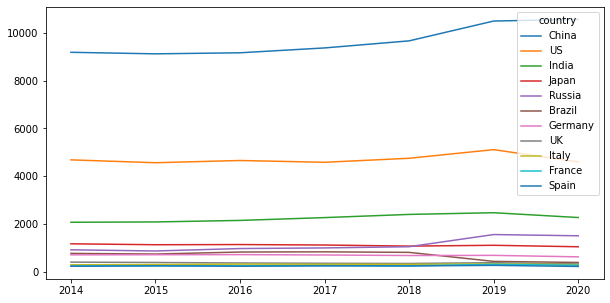

In [79]:
compre_df_t.plot(figsize=(10,5))